In [120]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import upfirdn
import common
import random

def decode_bpsk(list_in, umbral):
    """ BPSK demodulation
    """    
    return list(map(lambda i:-1 if list_in[i] < umbral else 1, range(0, len(list_in))))

In [121]:
beta = 0.25
# Number of symbol
span = 6.0
# Number of sample per symobl
sps  = 4.0
# Calculate SRRC filter
h = common.rcosdesign(beta, span, sps, 'normal')

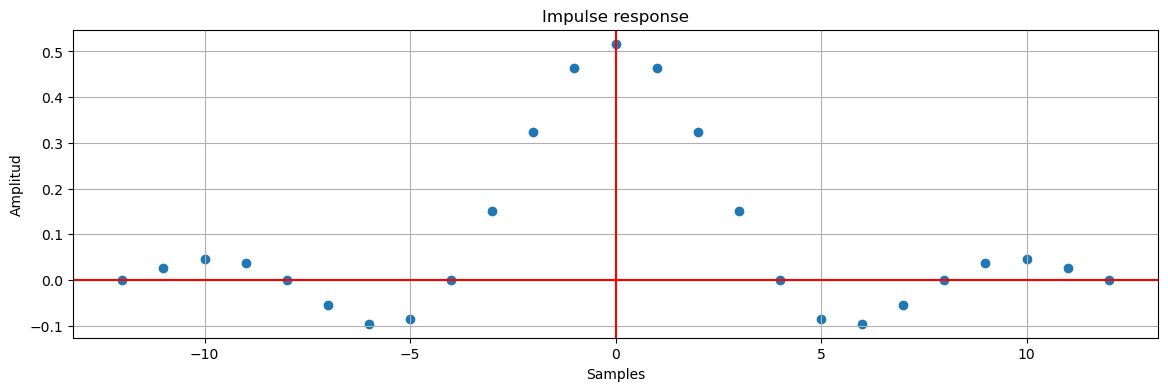

In [122]:
# Plot the SRRCfilter coeficients
fig = plt.figure()
fig.set_figwidth(14)
fig.set_figheight(4)
plt.title('Impulse response')
x_midrange = (span * sps) / 2 
x_range = (span * sps) + 1.0
x = np.linspace(-x_midrange, x_midrange, int(x_range))
plt.scatter(x,h)
plt.grid()
plt.xlabel("Samples")
plt.ylabel("Amplitud")
plt.axhline(0,color='red') # x = 0
plt.axvline(0,color='red') # x = 0
plt.show()

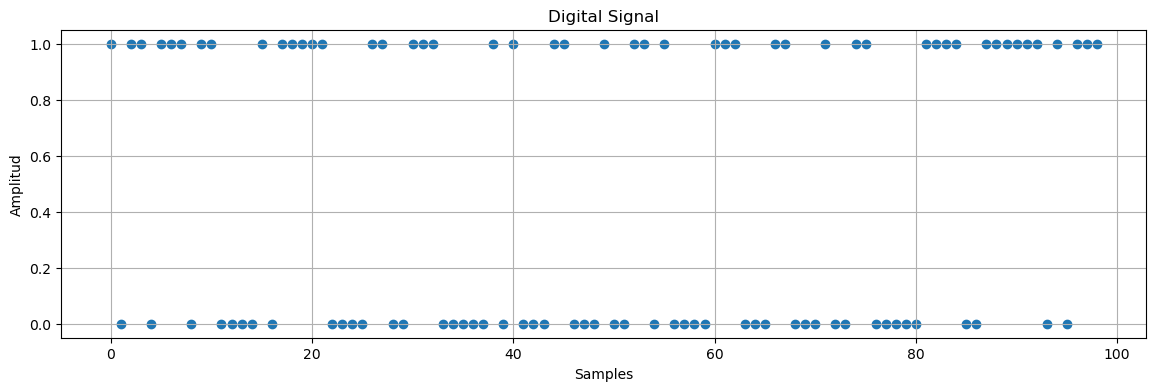

In [123]:
# Binary sequence generaion
num_d = 99
data_bin_tx = np.random.randint(2, size=num_d).tolist()

# Plot binary secuence
fig = plt.figure()
fig.set_figwidth(14)
fig.set_figheight(4)
plt.title('Digital Signal')
x = np.linspace(0, num_d-1, num_d)
plt.scatter(x, data_bin_tx)
plt.grid()
plt.xlabel("Samples")
plt.ylabel("Amplitud")
plt.show()

In [124]:
# BPSK codification
d_tx = common.code_bpsk(data_bin_tx)
d_tx = list(map(lambda i:d_tx[i].real , range(0, len(d_tx))))

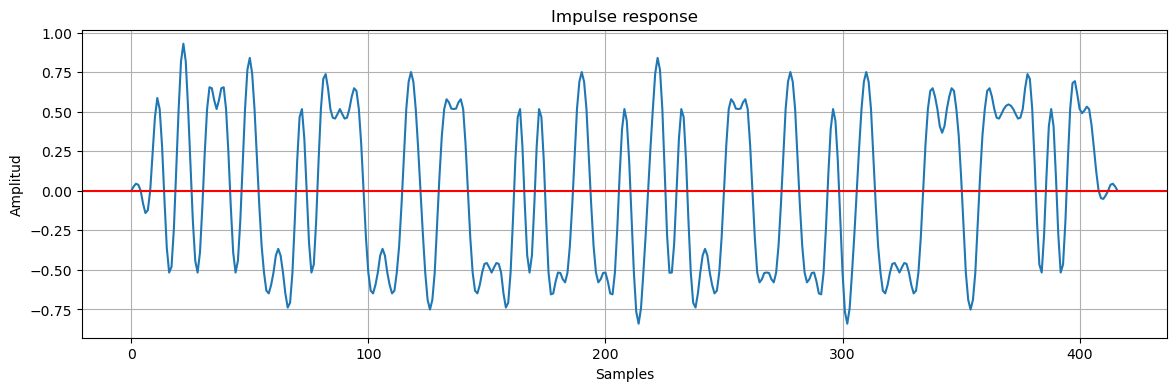

In [125]:
# UP converter with SRRC filter
signal =  upfirdn(h, d_tx, up=sps)

# Plot the signal after UP-CONVERTE
fig = plt.figure()
fig.set_figwidth(14)
fig.set_figheight(4)
plt.title('Impulse response')
plt.plot(signal)
plt.grid()
plt.xlabel("Samples")
plt.ylabel("Amplitud")
plt.axhline(0,color='red') # x = 0
plt.show()

99
66720
66720


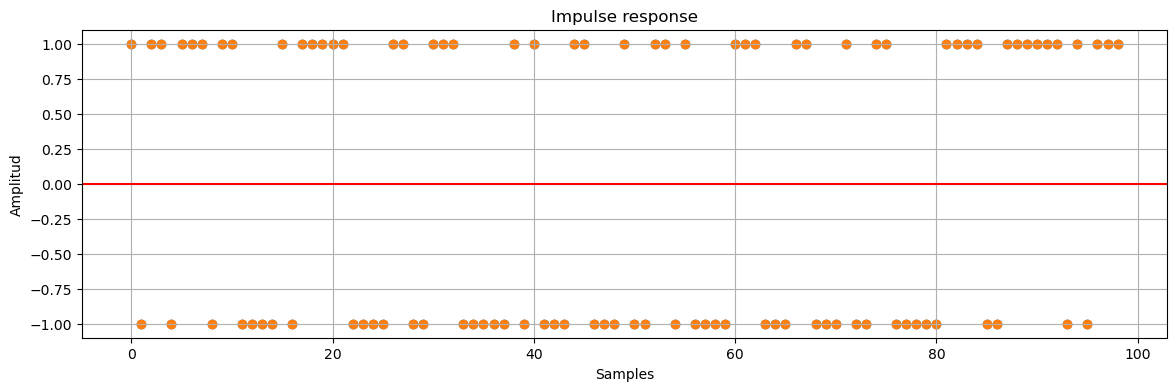

99

In [136]:
Fsamples = 12e6
Tsamples = 1 / Fsamples


# Intermedian frequency in MHz
Fnco = 120e6
NCO_samples = 16
NCO_cycles = num_d-sps
Tnco= 1 / Fnco
t = np.arange(0, Tsamples*len(signal), Tnco/NCO_samples)

nco_sin   = np.sin(2*np.pi*t/Tnco)
nco_cos   = np.cos(2*np.pi*t/Tnco)

signal_tx_fi = list(np.repeat(signal, int(NCO_samples * (Fnco/Fsamples))))*nco_cos

signal_rx_fi = signal_tx_fi*nco_cos

signal_rx_adc =signal_rx_fi.reshape(-1,160).max(1)

p1 = int(span)
p2 = int(span+num_d)

signal_rx_fi_dw = upfirdn(h, signal_rx_adc, down=4)[p1:p2]

d_rx_b = decode_bpsk(signal_rx_fi_dw, 0.5)

print(len(signal_rx_fi_dw))

print(len(t))
print(len(signal_tx_fi))

# Plot the signal after UP-CONVERTE
fig = plt.figure()
fig.set_figwidth(14)
fig.set_figheight(4)
plt.title('Impulse response')
x = np.linspace(0, len(signal_rx_fi_dw)-1, len(signal_rx_fi_dw))
plt.scatter(x,d_rx_b)
plt.scatter(x,d_tx)
plt.grid()
plt.xlabel("Samples")
plt.ylabel("Amplitud")
plt.axhline(0,color='red') # x = 0
plt.show()
len(signal_rx_fi_dw)

In [127]:
# Add noise to the signal
target_snr_db = 10

# Generate noise
signal_avg_watts = abs(np.mean(signal))
signal_avg_db = 10 * np.log10(signal_avg_watts)
noise_avg_db = signal_avg_db - target_snr_db
noise_avg_watts = 10 ** (noise_avg_db / 10)
mean_noise = 0
noise_volts = np.random.normal(mean_noise, np.sqrt(noise_avg_watts), len(signal))

# Signal + Noise
signal_noise = signal + noise_volts

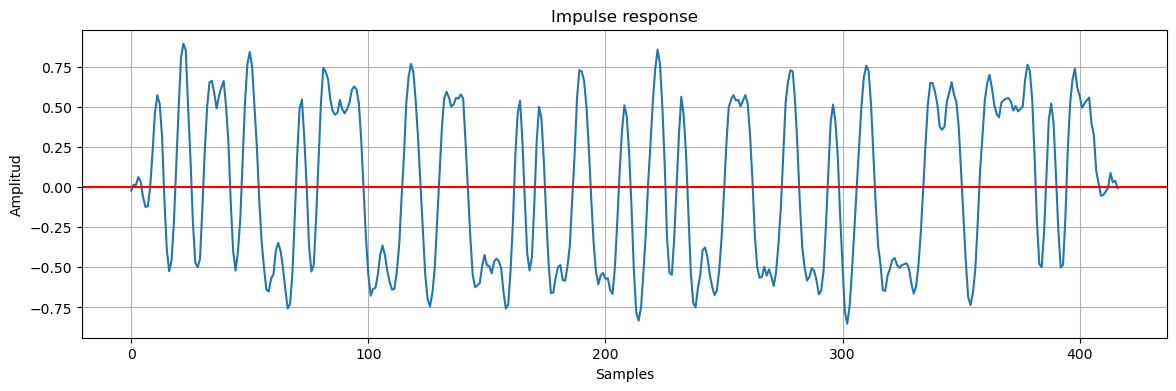

In [128]:
#Plot Signal + Noise
fig = plt.figure()
fig.set_figwidth(14)
fig.set_figheight(4)
plt.title('Impulse response')
plt.plot(signal_noise)
plt.grid()
plt.xlabel("Samples")
plt.ylabel("Amplitud")
plt.axhline(0,color='red') # x = 0
plt.show()

In [129]:
# DOWN convert with SRRC filter
p1 = int(sps+2)
p2 = int(sps+num_d+2)
d_rx = upfirdn(h, signal_noise, down=sps)[p1:p2]
print(len(d_rx))

99


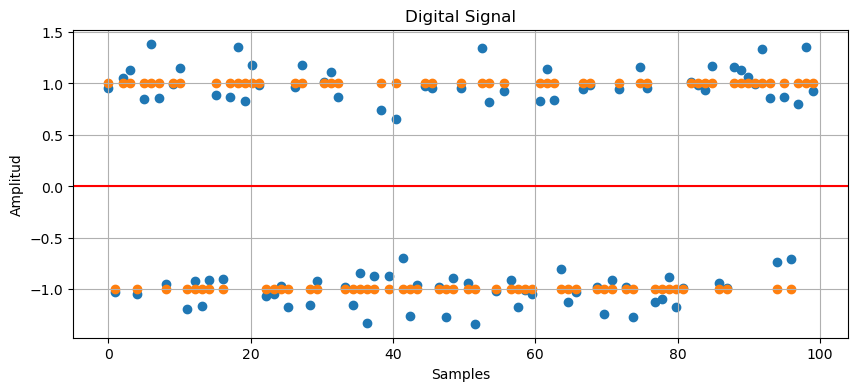

In [130]:
# Plot the BPSK send and the BPSK received
num_d= len(d_rx)
fig = plt.figure()
fig.set_figwidth(10)
fig.set_figheight(4)
plt.title('Digital Signal')
x = np.linspace(0, num_d, num_d)
plt.scatter(x, d_rx)
plt.scatter(x, d_tx)
plt.grid()
plt.xlabel("Samples")
plt.ylabel("Amplitud")
plt.axhline(0,color='red') # x = 0
plt.show()

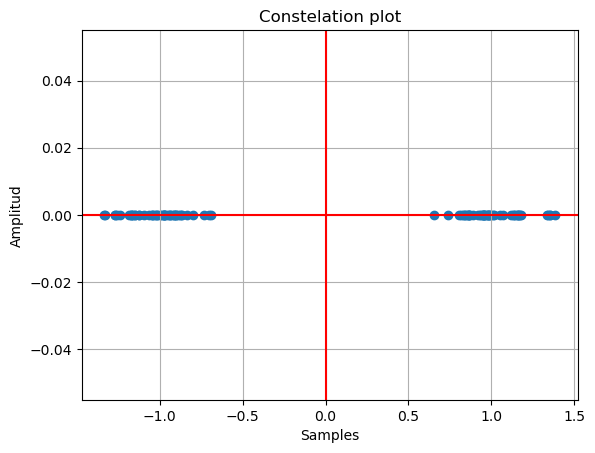

In [131]:
# Plot BPSK constelation
d_rx_const = d_rx + 1j * 0 
fig = plt.figure()
plt.title('Constelation plot')
plt.scatter(np.real(d_rx_const),np.imag(d_rx_const))
plt.grid()
plt.xlabel("Samples")
plt.ylabel("Amplitud")
plt.axhline(0,color='red') # x = 0
plt.axvline(0,color='red') # x = 0
plt.show()